## 한글 폰트 설치

In [ ]:
# 코랩에서 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임>세션 다시 시작 클릭 후 코드 실행

Password:sudo: a password is required
Password:

# 5차시: 단일 변수 시각화

- 이번 시간에는 하나의 변수만을 중심으로 시각화하는 방법을 학습합니다.
- 데이터의 분포, 빈도, 범주별 개수를 파악하여 변수의 특성을 이해하는 것이 목표입니다.

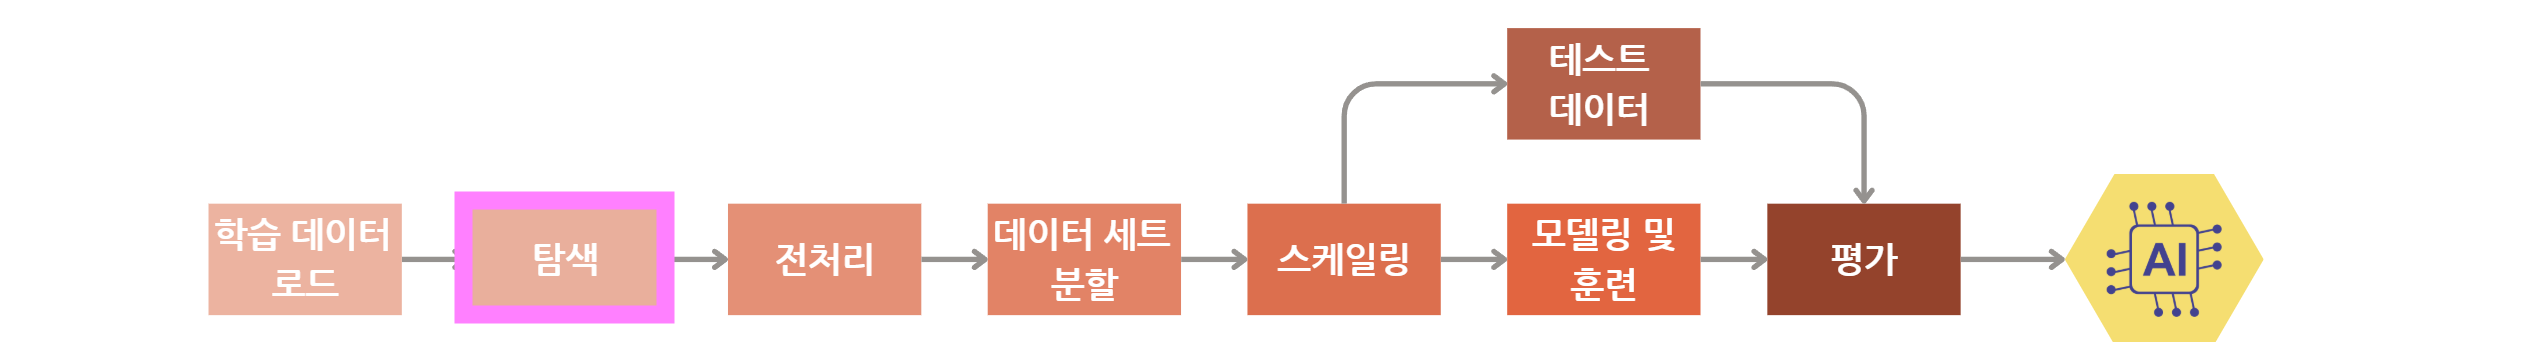

## 학습 목표
- 수치형 데이터의 분포를 시각화할 수 있다.
- 범주형 변수의 빈도를 시각화할 수 있다.
- matplotlib, seaborn의 기본 시각화 기능을 사용할 수 있다.

## 준비: 데이터 불러오기 및 설정
- 온라인 쇼핑몰 주문 데이터를 불러오고 `df`라는 변수명으로 저장합니다.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'AppleGothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 폰트 설정


In [3]:
df = pd.read_csv('온라인쇼핑몰_주문데이터.csv')
df.head()

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
0,1,0,3,이지훈,남성,22.0,1,0,ORD2024-000001,7000,NaN,웹
1,2,1,1,정하영,여성,38.0,1,0,ORD2024-000002,71000,SEO-850,모바일
2,3,1,3,최민수,여성,26.0,0,0,ORD2024-000003,8000,NaN,웹
3,4,1,1,이도윤,여성,35.0,1,0,ORD2024-000004,53000,BS-743,웹
4,5,0,3,이채원,남성,35.0,0,0,ORD2024-000005,8000,NaN,웹


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     891 non-null    object 
 1   배송완료여부   891 non-null    int64  
 2   고객등급     891 non-null    int64  
 3   고객명      891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   동시주문상품수  891 non-null    int64  
 7   쿠폰사용횟수   891 non-null    int64  
 8   주문번호     891 non-null    object 
 9   결제금액     891 non-null    int64  
 10  배송지코드    204 non-null    object 
 11  주문채널     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


---

### 📌 수치형 변수 vs 범주형 변수

#### 1. 수치형 변수 (Numerical Variable)
- **값이 숫자(정수, 실수)**로 표현됨
- **크기, 연산 가능**
- 예: 나이, 점수, 온도, 수입

#### 2. 범주형 변수 (Categorical Variable)
- **값이 특정 그룹 또는 범주**
- **숫자가 있어도 연산 불가능**
- 예: 성별(남/여), 지역, 전공, 등급(A/B/C)


온라인쇼핑몰_주문데이터에서 수치형/범주형 변수를 찾으시오.

---

## 수치형 변수 시각화 :histplot
- **정의**
  - **수치형 데이터의 분포**를 구간(bin)으로 나누어 막대 높이로 표현하는 히스토그램
  - 각 막대는 특정 구간에 속한 데이터의 개수(또는 비율)를 나타냄

- **용도**
  - 연속형 변수의 **전체 분포 형태** 확인 (정규분포, 왜도 등)
  - 데이터의 **집중 구간**, **이상치**, **왜곡** 여부 파악
  - 구간별 빈도를 기준으로 **스케일링**, **구간화** 등 전처리 방향 설정

- **해석 포인트**
  - 막대가 높은 구간일수록 해당 값대의 데이터가 많음
  - 좌우 비대칭일 경우 **왜도**가 존재 (오른쪽 긴 꼬리 = 양의 왜도)
  - 값이 특정 구간에 몰려 있다면 편향된 데이터일 수 있음
  - 데이터가 넓게 퍼져 있다면 **분산이 큰 변수**


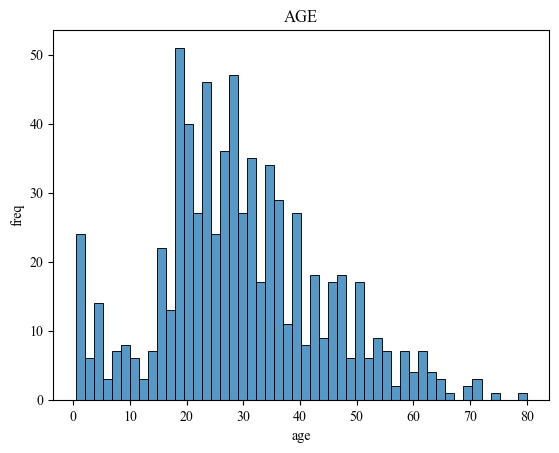

In [8]:
# 나이 분포
#sns.histplot(df['나이'])
sns.histplot(x='나이',data=df,bins=50)
plt.title('AGE')
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

## 범주형 변수 시각화:countplot
- **정의**
  - 범주형 데이터의 **빈도(개수)**를 막대그래프로 시각화하는 도구
  - 각 막대는 범주 하나에 해당하며, 막대의 높이는 해당 범주의 데이터 개수를 나타냄

- **용도**
  - 범주형 변수의 값 분포 파악
  - 데이터 **불균형 여부** 확인

- **해석 포인트**
  - 막대가 높을수록 해당 범주에 속한 데이터가 많다는 의미
  - 범주 간 빈도 차이가 크면 데이터 불균형 존재 가능성 있음



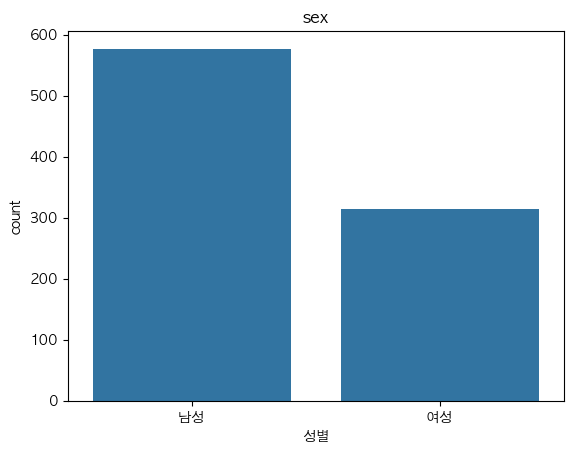

In [15]:
# 성별 빈도
sns.countplot(x='성별',data=df)
plt.title('sex')
plt.show()

---

## 연습문제

### 문제 1. 결제금액의 히스토그램을 그려보세요.
아래 가이드를 따라 코드를 작성하고 실행하세요.

- 대상 데이터: df의 '결제금액' 컬럼
- bins=30으로 설정하세요
- kde=True로 설정하여 밀도곡선도 함께 표시하세요
- 제목은 '온라인쇼핑몰 결제금액 분포'로 설정하세요
- x축 라벨은 '결제금액(원)', y축 라벨은 '주문건수'로 설정하세요

다음 보기 중 **그래프 해석으로 틀린 것**을 하나 고르세요.  
(예: `답안01 = 1`)

- 1. 결제금액은 특정 구간에 집중되어 있다.  
- 2. 밀도곡선을 통해 전체 분포의 형태를 부드럽게 확인할 수 있다.  
- 3. 결제금액이 클수록 주문건수도 많다는 것을 의미한다.  
- 4. 히스토그램은 구간별 주문건수(빈도)를 시각화한 것이다.

<function matplotlib.pyplot.show(close=None, block=None)>

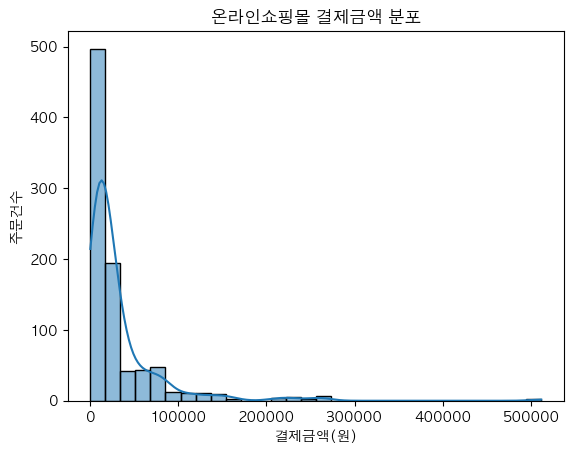

In [17]:
# 여기에 코드를 작성하세요.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family']='appleGothic'

df=pd.read_csv('온라인쇼핑몰_주문데이터.csv')
sns.histplot(x='결제금액',data=df,bins=30,kde=True)
plt.title('온라인쇼핑몰 결제금액 분포')
plt.xlabel('결제금액(원)')
plt.ylabel('주문건수')
plt.show

### 문제 2. 배송완료여부를 카운트플롯으로 표시하세요.
아래 가이드를 따라 코드를 작성하고 실행하세요.

- 대상 데이터: df의 '배송완료여부' 컬럼
- 막대 색상은 'lightcoral'로 설정하세요
- 제목은 '배송완료여부별 주문 건수'로 설정하세요
- x축 라벨은 '배송완료여부 (0:미완료, 1:완료)', y축 라벨은 '주문건수'로 설정하세요

In [21]:
sns.countplot?

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

<function matplotlib.pyplot.show(close=None, block=None)>

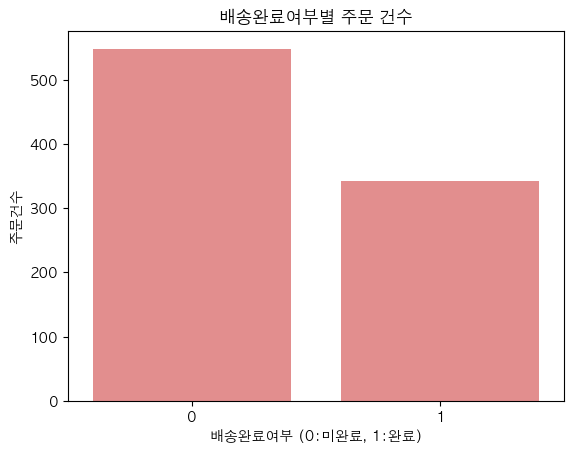

In [23]:
# 여기에 코드를 작성하세요.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

df=pd.read_csv('온라인쇼핑몰_주문데이터.csv')
sns.countplot(x='배송완료여부',data=df,color='lightcoral')
plt.title('배송완료여부별 주문 건수')
plt.xlabel('배송완료여부 (0:미완료, 1:완료)')
plt.ylabel('주문건수')
plt.show

---

## 도전 문제

### 문제 3.`결제금액` 컬럼에 대해 boxplot을 시각화하시오.
아래 가이드를 따라 코드를 작성하고 실행하세요.

- pandas는 pd, matplotlib은 plt, seaborn은 sns 별칭으로 로드하시오.
- 온라인쇼핑몰_주문데이터.csv 파일을 로드하고 df 변수에 할당하시오.
- boxplot으로 아래의 조건을 적용하여 시각화하시오.
    - 대상 데이터: df의 '결제금액' 컬럼
    - 타이틀: "결제금액 분포"
    - y축 라벨은 '결제금액'



<function matplotlib.pyplot.show(close=None, block=None)>

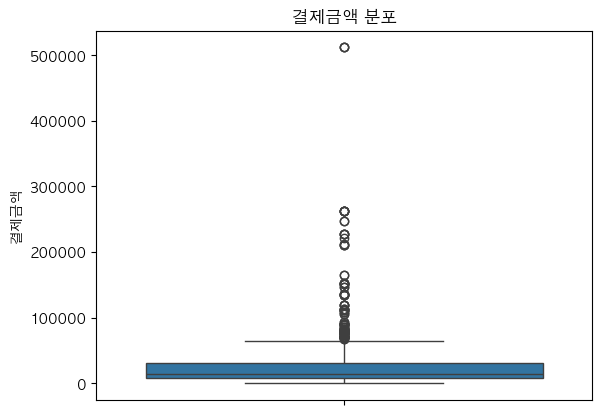

In [25]:
# 여기에 코드를 작성하세요.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('온라인쇼핑몰_주문데이터.csv')
sns.boxplot(y='결제금액',data=df)
plt.title('결제금액 분포')
plt.show